In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(style="whitegrid")

In [3]:
labels = pd.read_csv("train_labels.csv")
trains = pd.read_csv("train_values.csv")

In [4]:
trains_merged = trains[['building_id','geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']].merge(labels, how='inner')
trains_merged.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,damage_grade
0,802906,6,487,12198,3
1,28830,8,900,2812,2
2,94947,21,363,8973,3
3,590882,22,418,10694,2
4,201944,11,131,1488,3


In [5]:
trains_merged['geo_level_1_id'].value_counts().head(10)

6     24381
26    22615
10    22079
17    21813
8     19080
7     18994
20    17216
21    14889
4     14568
27    12532
Name: geo_level_1_id, dtype: int64

In [6]:
trains_level_1_top = trains_merged[['geo_level_1_id','damage_grade']][trains_merged.groupby('geo_level_1_id').geo_level_1_id.transform('count')>12531].copy()
trains_level_1_top = trains_level_1_top.pivot_table(aggfunc='size', index='geo_level_1_id', columns='damage_grade')
trains_level_1_top = trains_level_1_top.rename_axis(None,axis=1)
trains_level_1_top.columns = [['low damage','medium damage','high damage']]
trains_level_1_top.head(10)

,low damage,medium damage,high damage
geo_level_1_id,,,
4,521,11164,2883
6,2108,16222,6051
7,1033,11273,6688
8,654,8513,9913
10,1211,12107,8761
17,285,3913,17615
20,3311,11860,2045
21,322,5857,8710
26,8028,12645,1942


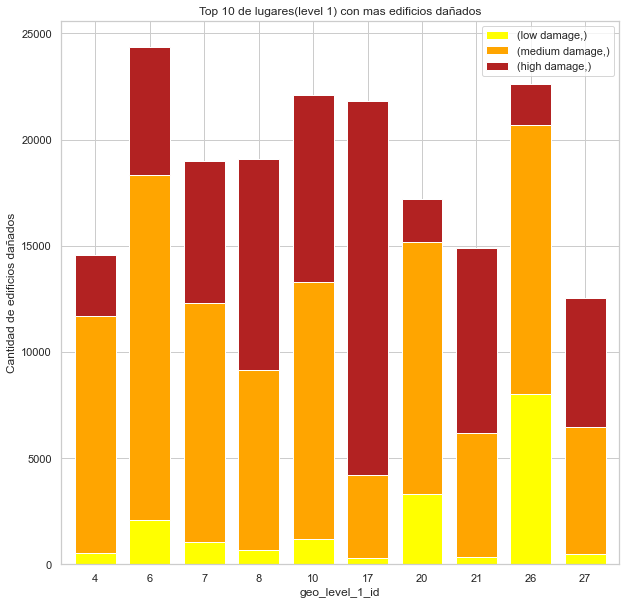

In [7]:
trains_level_1_top.plot(kind='bar', stacked=True,title = 'Top 10 de lugares(level 1) con mas edificios dañados' , rot = 0, figsize = ((10,10)), color = ["yellow", "orange", "firebrick"], edgecolor='white', width = 0.75)
ax=plt.gca()
ax.set_ylabel('Cantidad de edificios dañados')
plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=1)
plt.show()

In [8]:
trains_level_1_top = trains_merged[['geo_level_3_id','geo_level_2_id','geo_level_1_id','damage_grade']][trains_merged.groupby('geo_level_1_id').geo_level_1_id.transform('count')>12531].copy()
trains_level_1_top['geo_level_2_id'].value_counts().head(10)

39      4038
158     2520
181     2080
157     1897
363     1760
463     1740
673     1704
533     1684
1394    1537
548     1497
Name: geo_level_2_id, dtype: int64

In [9]:
trains_level_2_top = trains_level_1_top[['geo_level_2_id','damage_grade']][trains_level_1_top.groupby('geo_level_2_id').geo_level_2_id.transform('count')>1496].copy()
trains_level_2_top = trains_level_2_top.pivot_table(aggfunc='size', index='geo_level_2_id', columns='damage_grade')
trains_level_2_top = trains_level_2_top.rename_axis(None,axis=1)
trains_level_2_top.columns = [['low damage','medium damage','high damage']]
trains_level_2_top.head(10)

,low damage,medium damage,high damage
geo_level_2_id,,,
39,2049,1829,160
157,414,1184,299
158,533,1718,269
181,79,1328,673
363,145,557,1058
463,341,741,658
533,78,617,989
548,23,685,789
673,386,1211,107


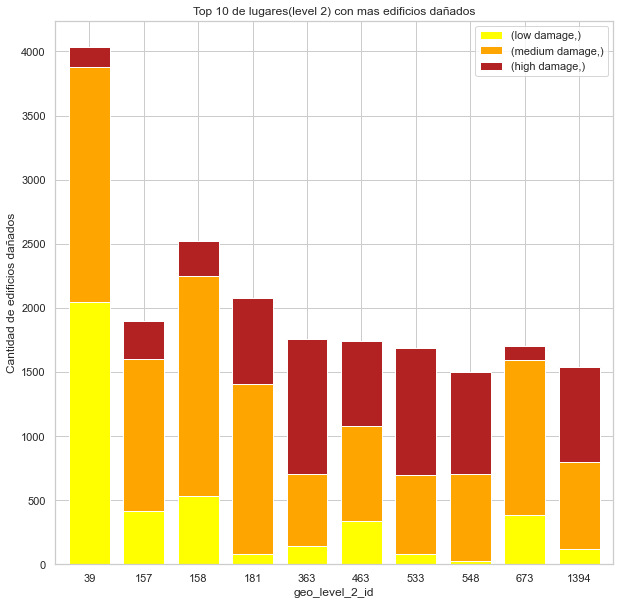

In [10]:
trains_level_2_top.plot(kind='bar', stacked=True,title = 'Top 10 de lugares(level 2) con mas edificios dañados' , rot = 0, figsize = ((10,10)), color = ["yellow", "orange", "firebrick"], edgecolor='white', width = 0.75)
ax=plt.gca()
ax.set_ylabel('Cantidad de edificios dañados')
plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=1)
plt.show()

In [11]:
trains_level_2_top = trains_level_1_top[['geo_level_2_id','geo_level_3_id','damage_grade']][trains_level_1_top.groupby('geo_level_2_id').geo_level_2_id.transform('count')>1496].copy()
trains_level_2_top['geo_level_3_id'].value_counts().head(10)

633      651
9133     647
621      530
11246    470
2005     466
11440    455
9229     381
2452     349
8236     303
10445    302
Name: geo_level_3_id, dtype: int64

In [12]:
trains_level_3_top = trains_level_2_top[['geo_level_3_id','damage_grade']][trains_level_2_top.groupby('geo_level_3_id').geo_level_3_id.transform('count')>301].copy()
trains_level_3_top = trains_level_3_top.pivot_table(aggfunc='size', index='geo_level_3_id', columns='damage_grade')
trains_level_3_top = trains_level_3_top.rename_axis(None,axis=1)
trains_level_3_top.columns = [['low damage','medium damage','high damage']]
trains_level_3_top.head(10)

,low damage,medium damage,high damage
geo_level_3_id,,,
621,157,343,30
633,372,273,6
2005,200,230,36
2452,98,216,35
8236,82,63,158
9133,450,182,15
9229,87,250,44
10445,97,180,25
11246,234,210,26


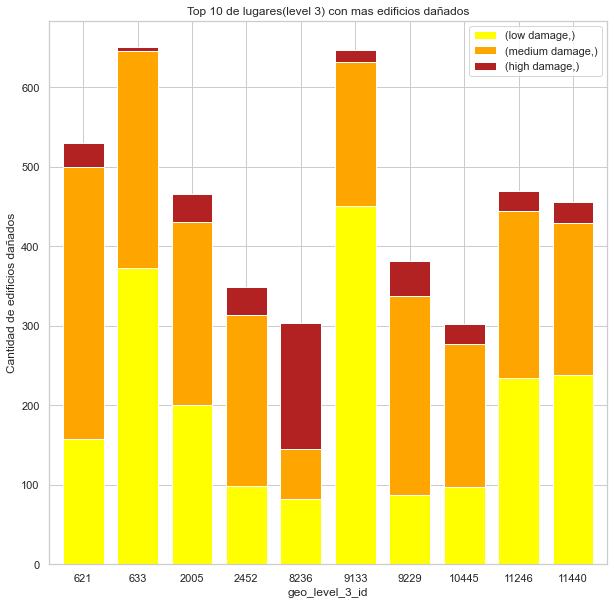

In [13]:
trains_level_3_top.plot(kind='bar', stacked=True,title = 'Top 10 de lugares(level 3) con mas edificios dañados' , rot = 0, figsize = ((10,10)), color = ["yellow", "orange", "firebrick"], edgecolor='white', width = 0.75)
ax=plt.gca()
ax.set_ylabel('Cantidad de edificios dañados')
plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=1)
plt.show()

In [14]:
trains_merged_17 = trains[trains.geo_level_1_id == 17].merge(labels, how='inner')
trains_merged_17.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,7962,17,1119,12188,2,20,9,6,t,r,...,0,0,0,0,0,0,0,0,0,3
1,452227,17,1275,4004,1,10,8,4,t,u,...,0,0,0,0,0,0,0,0,0,2
2,287845,17,817,6284,3,45,7,7,t,r,...,0,0,0,0,0,0,0,0,0,3
3,252816,17,303,4121,3,0,10,7,t,r,...,0,0,0,0,0,0,0,0,0,3
4,833827,17,1030,1525,3,70,16,7,t,r,...,0,0,0,0,0,0,0,0,0,3
5,135600,17,618,2018,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
6,624119,17,1183,12265,2,25,6,5,n,r,...,0,0,0,0,0,0,0,0,0,3
7,612701,17,1183,1113,3,15,7,7,t,r,...,0,0,0,0,0,0,0,0,0,3
8,645774,17,1322,5359,3,10,6,7,n,r,...,0,0,0,0,0,0,0,0,0,3
9,965807,17,1183,3257,2,20,9,5,t,r,...,0,0,0,0,0,0,0,0,0,3


In [16]:
trains_merged_17_by_age = trains_merged_17[['damage_grade','age']]
trains_merged_17_by_age = trains_merged_17_by_age[trains_merged_17_by_age['age'] < 50]
trains_merged_17_by_age = trains_merged_17_by_age.groupby("damage_grade").agg({'age': 'count'})
trains_merged_17_by_age.head()

,age
damage_grade,
1,284
2,3698
3,16180


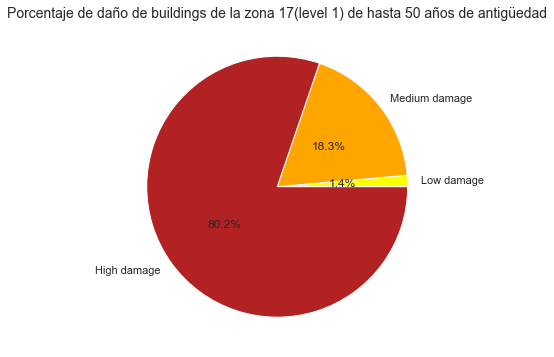

In [17]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=trains_merged_17_by_age['age'], autopct="%.1f%%",\
        labels=['Low damage', 'Medium damage', 'High damage'], colors=["yellow", "orange", "firebrick"], pctdistance=0.5)
plt.title("Porcentaje de daño de buildings de la zona 17(level 1) de hasta 50 años de antigüedad", fontsize=14);

In [18]:
trains_merged_17_by_age = trains_merged_17[['damage_grade','age']]
trains_merged_17_by_age = trains_merged_17_by_age[trains_merged_17_by_age['age'] > 50]
trains_merged_17_by_age = trains_merged_17_by_age.groupby("damage_grade").agg({'age': 'count'})
trains_merged_17_by_age.head()

,age
damage_grade,
1,1
2,152
3,964


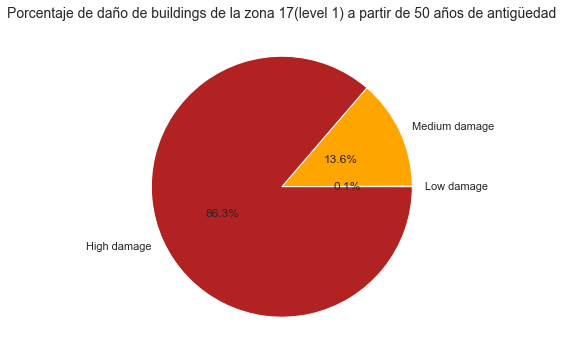

In [19]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=trains_merged_17_by_age['age'], autopct="%.1f%%",\
        labels=['Low damage', 'Medium damage', 'High damage'], colors=["yellow", "orange", "firebrick"], pctdistance=0.5)
plt.title("Porcentaje de daño de buildings de la zona 17(level 1) a partir de 50 años de antigüedad", fontsize=14);

Como podemos ver en estas visualizaciones los porcentajes de daño de la zona 17 son muy distintos a los de el set de datos en general, predominando los daños graves(High damage) cuando en el set de datos por lo general predominan los daños medios(Medium damage) y quedando los daños leves(Low damage) practicamente desaparecidos. Por ahora no es posible saber si estos daños fueron por la localizacion de esta zona o si tuvo algo que ver otros factores.

In [56]:
trains_merged_17_por_piso = trains_merged_17[['count_floors_pre_eq', 'damage_grade']]
trains_merged_17_por_piso.head(10)

,count_floors_pre_eq,damage_grade
0,2,3
1,1,2
2,3,3
3,3,3
4,3,3
5,2,3
6,2,3
7,3,3
8,3,3
9,2,3


In [57]:
trains_merged_17_un_piso = trains_merged_17_por_piso.groupby('count_floors_pre_eq').get_group(1)
plot = trains_merged_17_un_piso.copy()
del plot['count_floors_pre_eq']
plot['total_un_piso'] = plot.groupby('damage_grade')['damage_grade'].transform('count')
plot = plot.set_index('damage_grade').drop_duplicates()
plot.head(10)

,total_un_piso
damage_grade,
2,444
3,1564
1,142


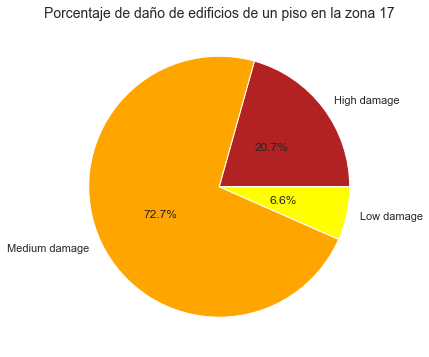

In [58]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=plot['total_un_piso'], autopct="%.1f%%",\
        labels=['High damage', 'Medium damage', 'Low damage'], colors=["firebrick", "orange", "yellow"], pctdistance=0.5)
plt.title("Porcentaje de daño de edificios de un piso en la zona 17", fontsize=14);

In [59]:
trains_merged_17_dos_pisos = trains_merged_17_por_piso.groupby('count_floors_pre_eq').get_group(2)
plot = trains_merged_17_dos_pisos.copy()
del plot['count_floors_pre_eq']
plot['total_dos_piso'] = plot.groupby('damage_grade')['damage_grade'].transform('count')
plot = plot.set_index('damage_grade').drop_duplicates()
plot.head(10)

,total_dos_piso
damage_grade,
3,8989
2,1884
1,85


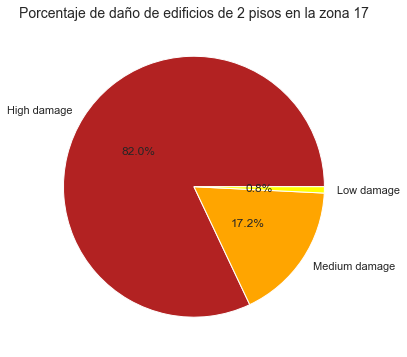

In [60]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=plot['total_dos_piso'], autopct="%.1f%%",\
        labels=['High damage', 'Medium damage', 'Low damage'], colors=["firebrick", "orange", "yellow"], pctdistance=0.5)
plt.title("Porcentaje de daño de edificios de 2 pisos en la zona 17", fontsize=14);

In [104]:
trains_merged_17_tres_pisos = trains_merged_17_por_piso.groupby('count_floors_pre_eq').get_group(3)
plot = trains_merged_17_tres_pisos.copy()
del plot['count_floors_pre_eq']
plot['total_tres_piso'] = plot.groupby('damage_grade')['damage_grade'].transform('count')
plot = plot.set_index('damage_grade').drop_duplicates()
plot.head(10)

,total_tres_piso
damage_grade,
3,6981
2,1452
1,38


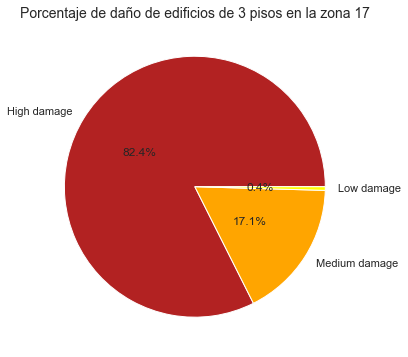

In [105]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=plot['total_tres_piso'], autopct="%.1f%%",\
        labels=['High damage', 'Medium damage', 'Low damage'], colors=["firebrick", "orange", "yellow"], pctdistance=0.5)
plt.title("Porcentaje de daño de edificios de 3 pisos en la zona 17", fontsize=14);

In [77]:
cols = list(trains_merged_17.columns)
new_cols = ["damage_grade"]

for col in cols:
    if (col.startswith("has_superstructure")):
        new_cols.append(col)

new_cols

['damage_grade',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other']

In [78]:
superstructure_grouped_by_damage_grade_id17 = trains_merged_17[new_cols]
superstructure_grouped_by_damage_grade_id17 = superstructure_grouped_by_damage_grade_id17.groupby('damage_grade').agg("sum")
superstructure_grouped_by_damage_grade_id17

,damage_grade,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,3,0,1,0,0,0,0,1,0,0,0,0
1,2,0,0,0,0,0,1,0,0,0,0,0
2,3,0,1,0,0,0,0,1,0,0,0,0
3,3,0,1,0,0,0,0,0,0,0,0,0
4,3,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21808,3,0,1,0,0,0,0,0,0,0,0,0
21809,2,0,1,0,0,0,0,0,0,0,0,0
21810,3,0,1,0,0,0,0,0,0,0,0,0
21811,3,0,1,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Cantidad de viviendas')

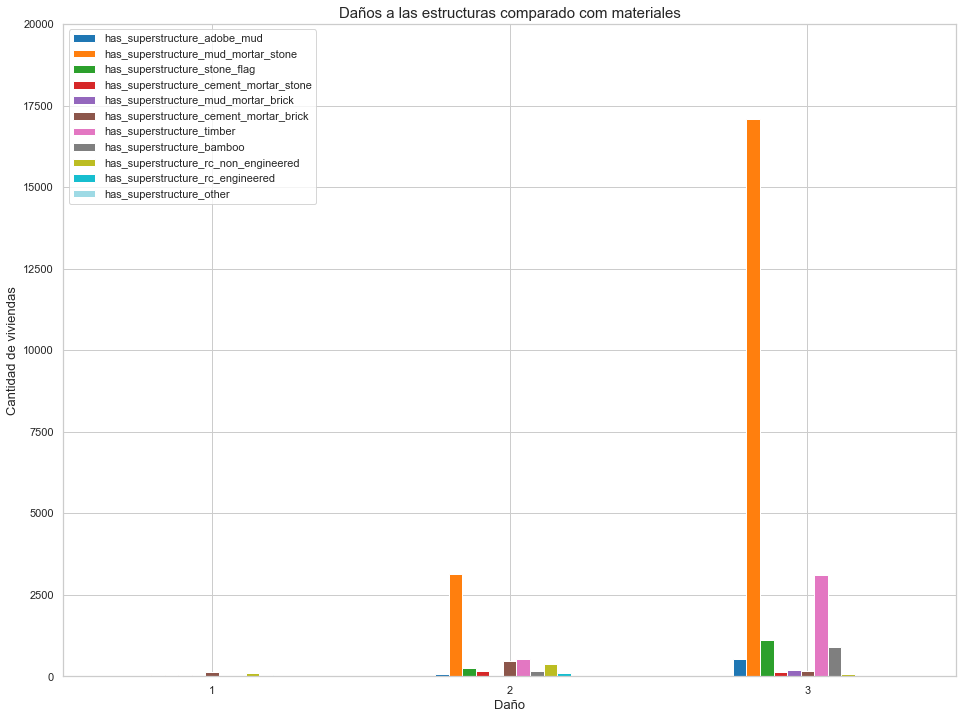

In [83]:
superstructure_grouped_by_age_id17.plot(kind='bar', rot=0, subplots=False, figsize=(16, 12), colormap='tab20', ylim=[0, 20000])
plt.title("Daños a las estructuras comparado com materiales", fontsize=15)
plt.xlabel("Daño", fontsize=13)
plt.ylabel("Cantidad de viviendas", fontsize=13)

In [89]:
trains_merged_6 = trains[trains.geo_level_1_id == 6].merge(labels, how='inner')
trains_merged_6.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,633759,6,706,12267,2,5,7,5,t,r,...,0,0,0,0,0,0,0,0,0,2
2,157370,6,706,11722,2,20,4,4,t,r,...,0,0,0,0,0,0,0,0,0,2
3,33651,6,1210,9423,3,40,5,7,t,r,...,0,0,0,0,0,0,0,0,0,3
4,1005736,6,724,7981,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,2
5,961851,6,1210,1547,3,10,13,9,t,r,...,0,0,0,0,0,0,0,0,0,2
6,270811,6,139,2223,2,20,15,7,t,r,...,0,0,0,0,0,0,0,0,0,2
7,591993,6,287,3107,3,30,8,6,t,r,...,0,0,0,0,0,0,0,0,0,3
8,907445,6,981,7008,2,35,7,6,t,r,...,0,0,0,0,0,0,0,0,0,2
9,483230,6,1253,5667,3,25,9,8,t,r,...,0,0,0,0,0,0,0,0,0,2


In [90]:
trains_merged_6_by_age = trains_merged_6[['damage_grade','age']]
trains_merged_6_by_age = trains_merged_6_by_age[trains_merged_6_by_age['age'] < 50]
trains_merged_6_by_age = trains_merged_6_by_age.groupby("damage_grade").agg({'age': 'count'})
trains_merged_6_by_age.head()

,age
damage_grade,
1,2087
2,14236
3,5167


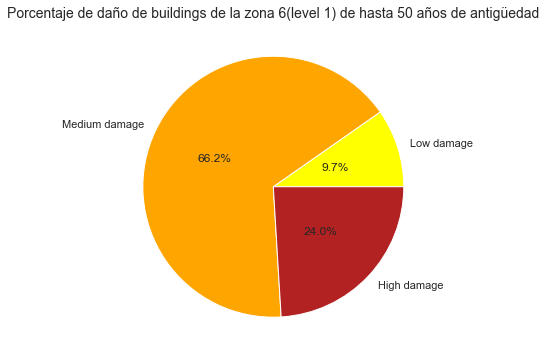

In [91]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=trains_merged_6_by_age['age'], autopct="%.1f%%",\
        labels=['Low damage', 'Medium damage', 'High damage'], colors=["yellow", "orange", "firebrick"], pctdistance=0.5)
plt.title("Porcentaje de daño de buildings de la zona 6(level 1) de hasta 50 años de antigüedad", fontsize=14);

In [92]:
trains_merged_6_by_age = trains_merged_6[['damage_grade','age']]
trains_merged_6_by_age = trains_merged_6_by_age[trains_merged_6_by_age['age'] > 50]
trains_merged_6_by_age = trains_merged_6_by_age.groupby("damage_grade").agg({'age': 'count'})
trains_merged_6_by_age.head()

,age
damage_grade,
1,17
2,1493
3,638


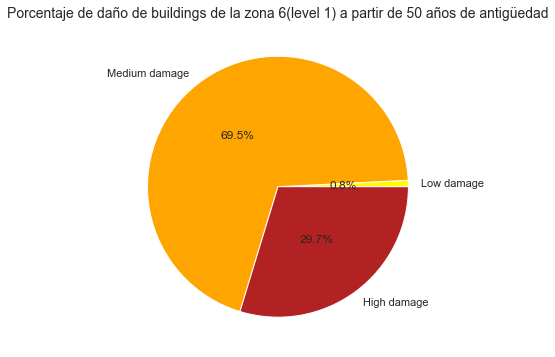

In [93]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=trains_merged_6_by_age['age'], autopct="%.1f%%",\
        labels=['Low damage', 'Medium damage', 'High damage'], colors=["yellow", "orange", "firebrick"], pctdistance=0.5)
plt.title("Porcentaje de daño de buildings de la zona 6(level 1) a partir de 50 años de antigüedad", fontsize=14);

In [94]:
trains_merged_6_por_piso = trains_merged_6[['count_floors_pre_eq', 'damage_grade']]
trains_merged_6_por_piso.head(10)

,count_floors_pre_eq,damage_grade
0,2,3
1,2,2
2,2,2
3,3,3
4,2,2
5,3,2
6,2,2
7,3,3
8,2,2
9,3,2


In [95]:
trains_merged_6_un_piso = trains_merged_6_por_piso.groupby('count_floors_pre_eq').get_group(1)
plot = trains_merged_6_un_piso.copy()
del plot['count_floors_pre_eq']
plot['total_un_piso'] = plot.groupby('damage_grade')['damage_grade'].transform('count')
plot = plot.set_index('damage_grade').drop_duplicates()
plot.head(10)

,total_un_piso
damage_grade,
2,1182
1,440
3,567


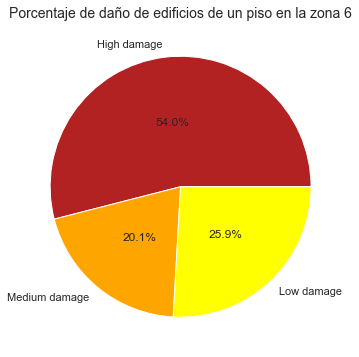

In [96]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=plot['total_un_piso'], autopct="%.1f%%",\
        labels=['High damage', 'Medium damage', 'Low damage'], colors=["firebrick", "orange", "yellow"], pctdistance=0.5)
plt.title("Porcentaje de daño de edificios de un piso en la zona 6", fontsize=14);

In [97]:
trains_merged_6_dos_pisos = trains_merged_6_por_piso.groupby('count_floors_pre_eq').get_group(2)
plot = trains_merged_6_dos_pisos.copy()
del plot['count_floors_pre_eq']
plot['total_dos_piso'] = plot.groupby('damage_grade')['damage_grade'].transform('count')
plot = plot.set_index('damage_grade').drop_duplicates()
plot.head(10)

,total_dos_piso
damage_grade,
3,4279
2,10911
1,695


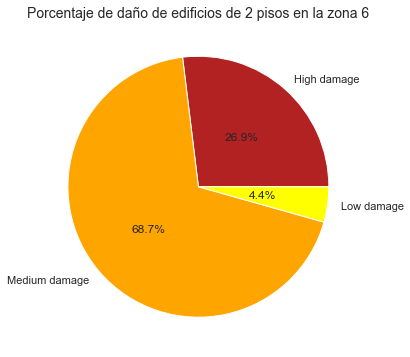

In [98]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=plot['total_dos_piso'], autopct="%.1f%%",\
        labels=['High damage', 'Medium damage', 'Low damage'], colors=["firebrick", "orange", "yellow"], pctdistance=0.5)
plt.title("Porcentaje de daño de edificios de 2 pisos en la zona 6", fontsize=14);

In [99]:
trains_merged_6_tres_pisos = trains_merged_6_por_piso.groupby('count_floors_pre_eq').get_group(3)
plot = trains_merged_6_tres_pisos.copy()
del plot['count_floors_pre_eq']
plot['total_tres_piso'] = plot.groupby('damage_grade')['damage_grade'].transform('count')
plot = plot.set_index('damage_grade').drop_duplicates()
plot.head(10)

,total_tres_piso
damage_grade,
3,1152
2,3703
1,502


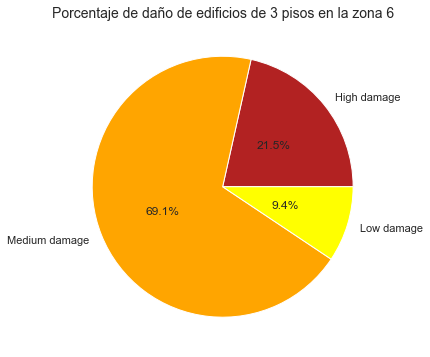

In [100]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=plot['total_tres_piso'], autopct="%.1f%%",\
        labels=['High damage', 'Medium damage', 'Low damage'], colors=["firebrick", "orange", "yellow"], pctdistance=0.5)
plt.title("Porcentaje de daño de edificios de 3 pisos en la zona 6", fontsize=14);

In [101]:
superstructure_grouped_by_damage_grade_id6 = trains_merged_6[new_cols]
superstructure_grouped_by_damage_grade_id6 = superstructure_grouped_by_damage_grade_id6.groupby('damage_grade').agg("sum")
superstructure_grouped_by_damage_grade_id6

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
damage_grade,,,,,,,,,,,
1,78,225,0,27,67,858,85,35,648,688,31
2,2962,12423,48,81,1460,786,2012,305,333,159,65
3,640,5591,37,5,198,29,449,55,3,1,22


Text(0, 0.5, 'Cantidad de viviendas')

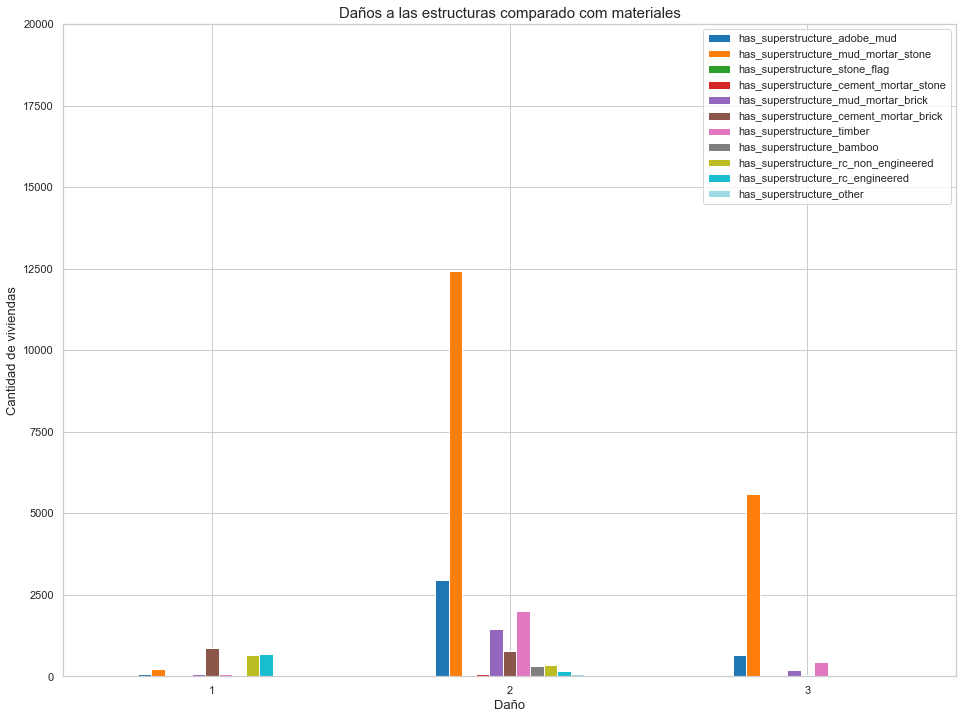

In [102]:
superstructure_grouped_by_damage_grade_id6.plot(kind='bar', rot=0, subplots=False, figsize=(16, 12), colormap='tab20', ylim=[0, 20000])
plt.title("Daños a las estructuras comparado com materiales", fontsize=15)
plt.xlabel("Daño", fontsize=13)
plt.ylabel("Cantidad de viviendas", fontsize=13)